# Analysis of Income Data

###### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
data = pd.read_excel("DS1_C5_S2_Income_Data_Challenge.xlsx")

Checking null values in data

In [3]:
data.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

Checking data type of each column

In [4]:
data.dtypes

Age                int64
WorkClass         object
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

###### 

## TASK - 1 :

### Define a function to identify the data type of the columns as categorical or numerical. Separate the names of the categorical and numerical columns and save them into two different lists.

In [5]:
data["Gender"].dtypes

dtype('O')

In [6]:
def data_type(data):
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtypes != 'O':
            numerical.append(i)
        else:
            categorical.append(i)
            
    return categorical, numerical

categorical, numerical = data_type(data)

In [7]:
categorical

['WorkClass',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Gender',
 'Native_Country',
 'Income_Bracket']

In [8]:
numerical

['Age', 'Education_Num', 'Hours_Per_Week']

###### 

## TASK - 2 :

### Perform bivariate and multivariate analysis on categorical columns (identified in Task 1) with the help of appropriate graphs/charts.

#### a) Work class wise income of employees

In [9]:
z = data.drop(data[data["WorkClass"]==" ?"].index)

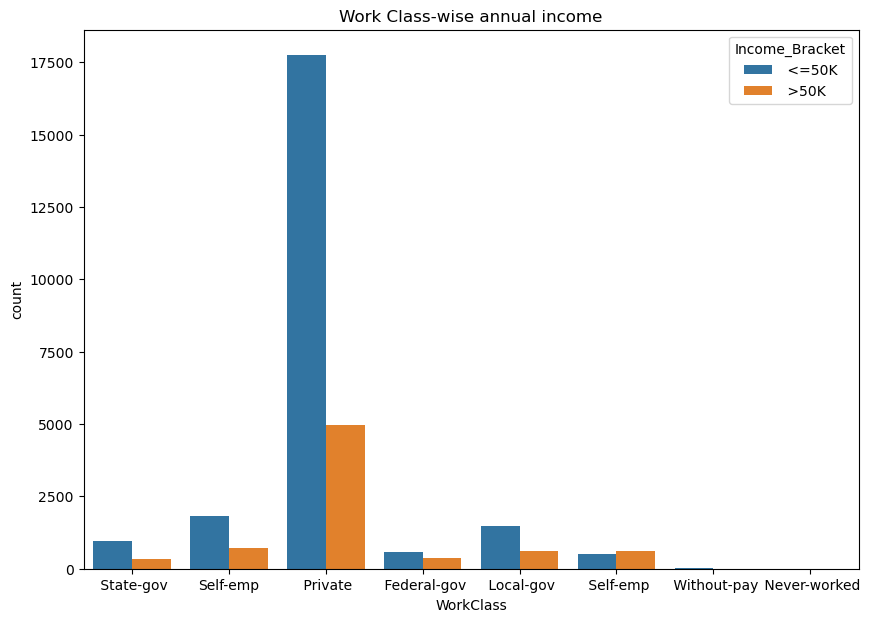

In [10]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Work Class-wise annual income")
sns.countplot(x = "WorkClass", hue = "Income_Bracket", data = z)
plt.show()

### ***Interpretation : Most people work in the private sector, most of them earning less than or equal to 50K annually, while others earn more than 50K.

###### 

#### b) Marital status wise Income_Brackets of employees

In [11]:
a = data[(data["WorkClass"]==" Private") & (data["Income_Bracket"]==" <=50K")]

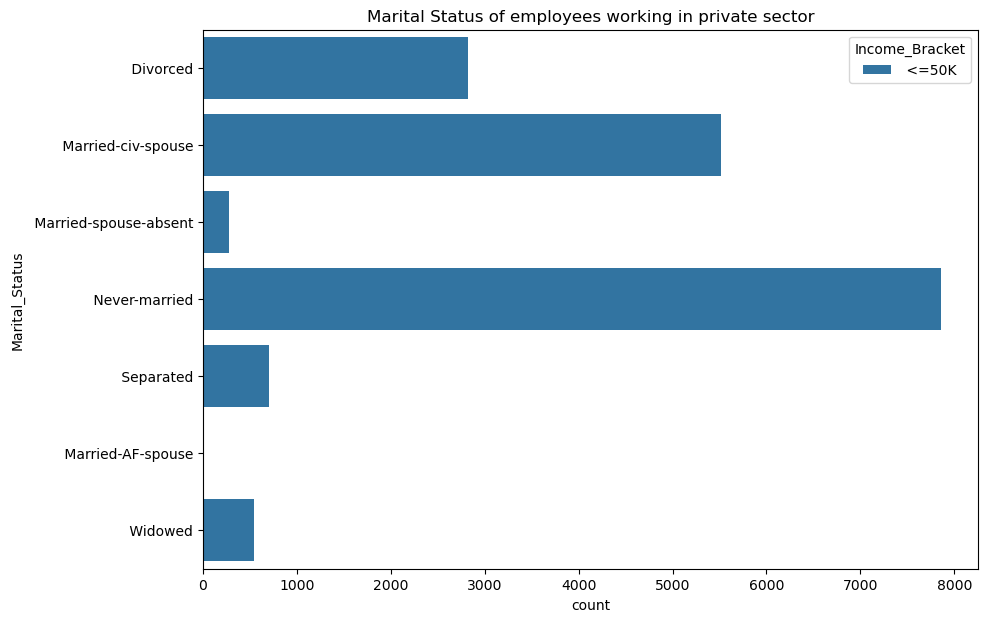

In [12]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Marital Status of employees working in private sector")
sns.countplot(y = "Marital_Status", hue = "Income_Bracket", data = a)
plt.show()

### ***Interpretation : Most of the Employees who belongs to private sector and has an income <50K are single.

###### 

#### Gender-wise income of employees

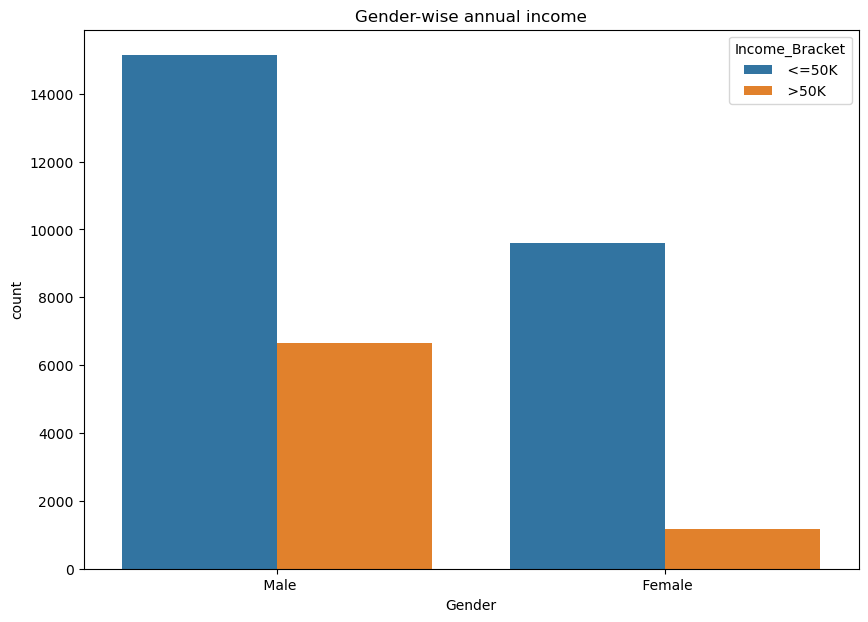

In [13]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Gender-wise annual income")
sns.countplot(x = "Gender", hue = "Income_Bracket", data = data)
plt.show()

### *** Interpretation : The majority of male employees work in the company.

###### 

#### The occupation of male employees.

In [14]:
b = data[(data["Gender"]==" Male") & (data["Income_Bracket"]==" <=50K")]

In [15]:
b = b.drop(b[b["Occupation"]==" ?"].index)

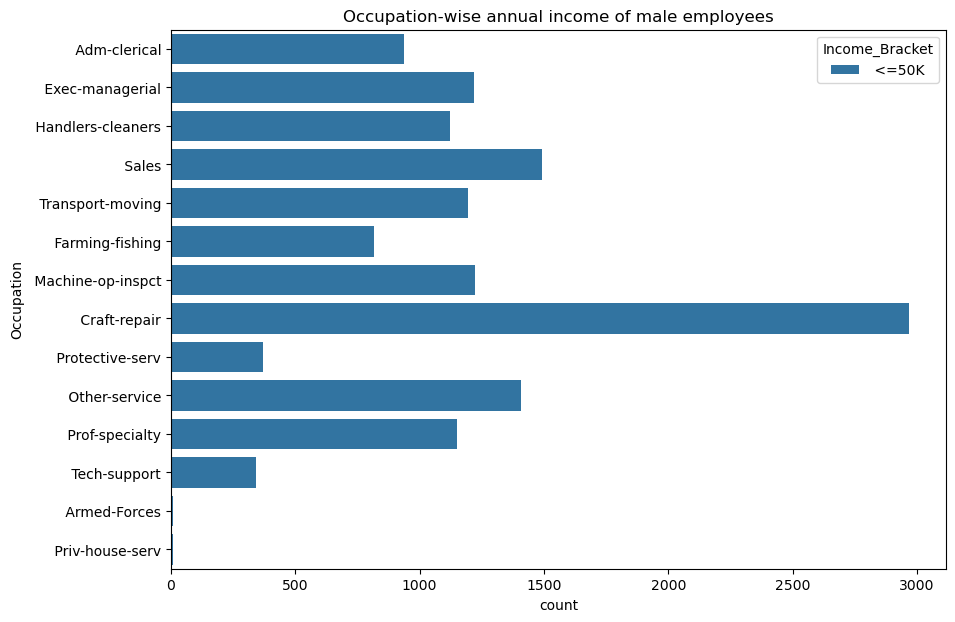

In [16]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Occupation-wise annual income of male employees")
sns.countplot(y = "Occupation", hue = "Income_Bracket", data = b)
plt.show()

### ***Interpretation : Most of the male employees occupied in the Craft-Repair field earn less than or equal to 50K annually.

###### 

#### Educational background of employees in Craft-Repair role.

In [17]:
c = b[b["Occupation"]==" Craft-repair"]

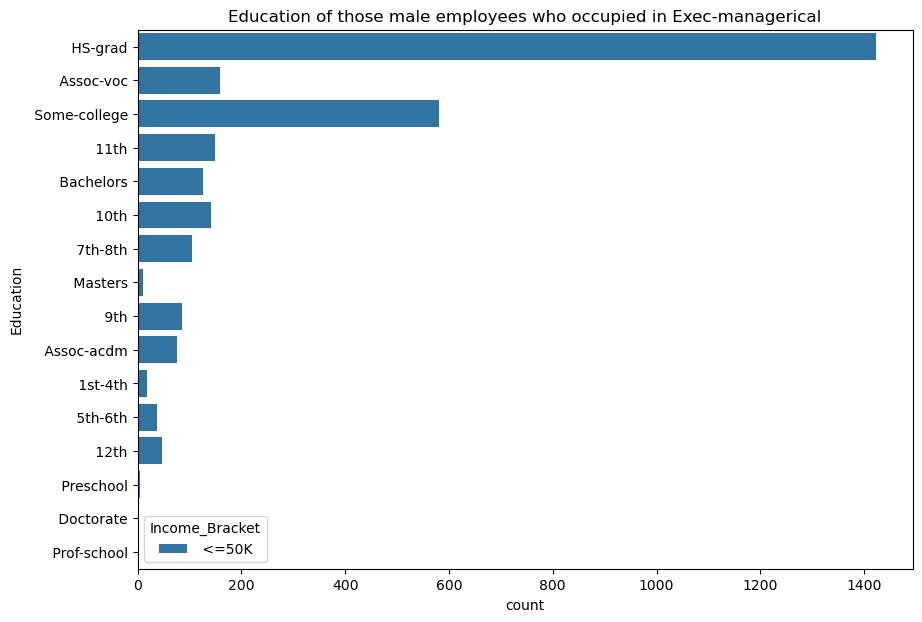

In [18]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Education of those male employees who occupied in Exec-managerical")
sns.countplot(y = "Education", hue = "Income_Bracket", data = c)
plt.show()

### ***Interpretation : Most male employees earning less than 50K annually have completed their HS-grad degree. 

###### 

### Country wise annual income of employees.

In [19]:
data["Native_Country"].nunique()

42

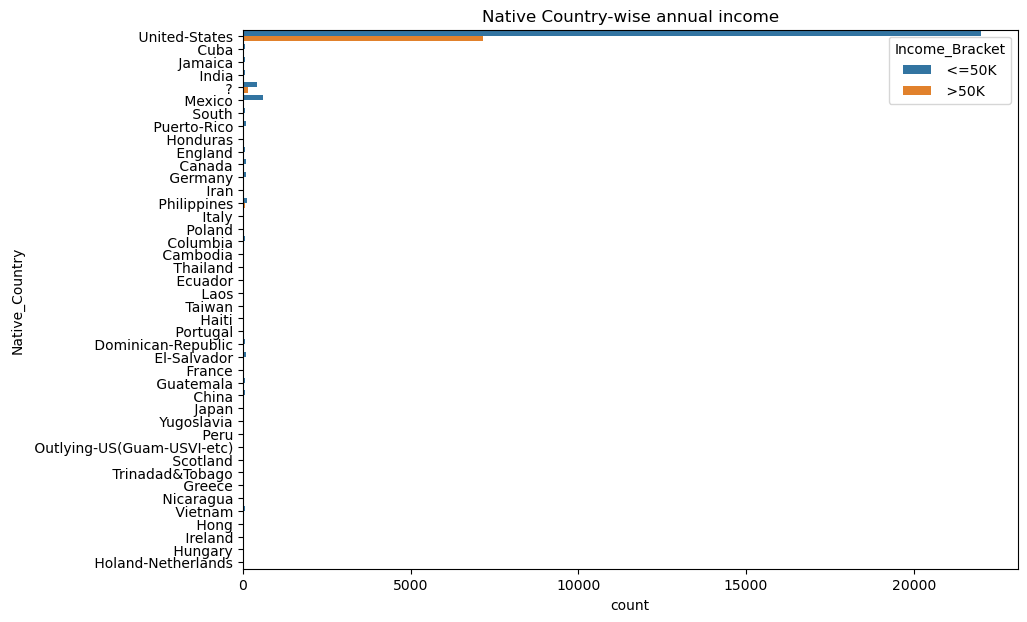

In [20]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Native Country-wise annual income")
sns.countplot(y = "Native_Country", hue = "Income_Bracket", data = data)
plt.show()

### ***Interpretation : Most of the employees belongs to united-states.

In [21]:
s = data[(data["Native_Country"]==" United-States") & (data["Income_Bracket"]==" <=50K")]

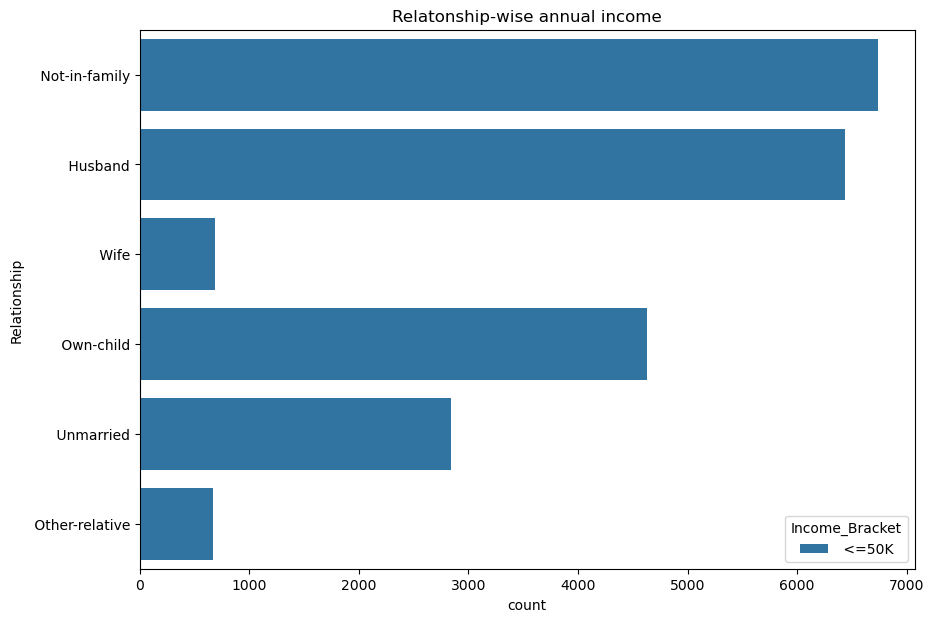

In [22]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Relatonship-wise annual income")
sns.countplot(y = "Relationship", hue = "Income_Bracket", data = s)
plt.show()

### ***Interpretation : Most of the employees who are from united states and earning income less than 50K are Not-in-Family.

###### 

## TASK - 3 :

### Perform bivariate and multivariate analysis on the numerical columns (identified in Task 1) using appropriate graphs/charts.

In [23]:
numerical

['Age', 'Education_Num', 'Hours_Per_Week']

#### Removing Outliers from Numerical Data.

In [24]:
def treat_outliers(data, x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)

    IQR = Q3 - Q1

    LF = Q1 - 1.5 * IQR
    UF = Q3 + 1.5 * IQR

    outliers = (data[x] < LF) | (data[x] > UF)

    data.loc[outliers, x] = data[x].mean()

    return data

In [25]:
x = treat_outliers(data,"Age")

In [26]:
y = treat_outliers(data,"Education_Num")

In [27]:
v = treat_outliers(data,"Hours_Per_Week")

In [28]:
# x = x[x["Native_Country"]==" United-States"]

#### Age wise Income Brackets

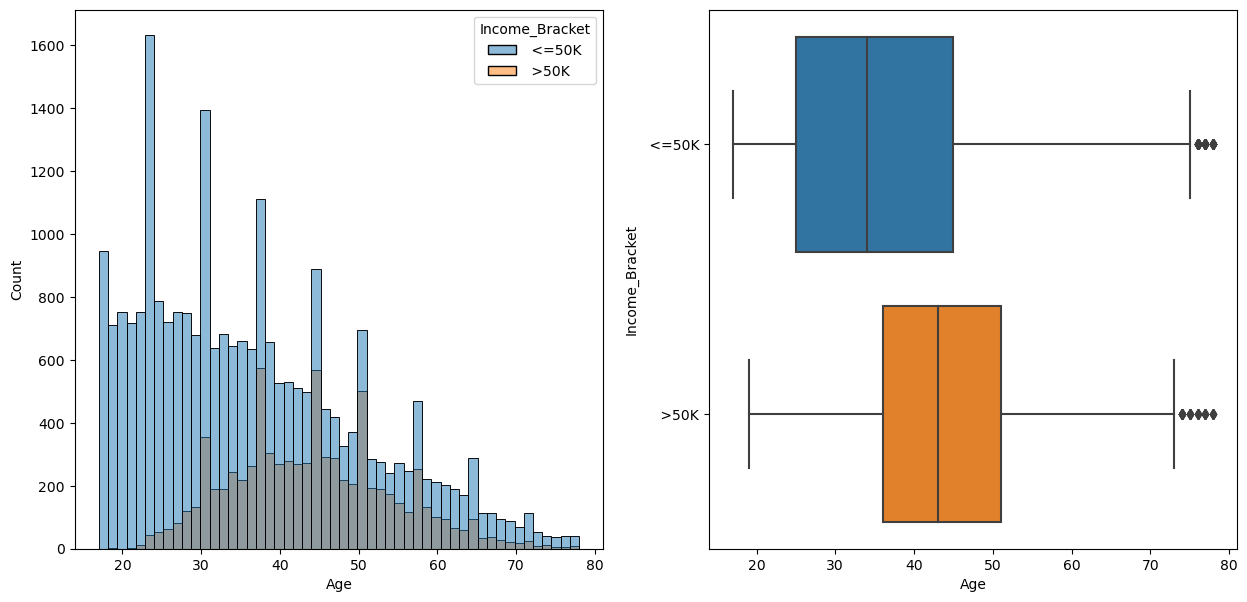

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = x["Age"], hue = x["Income_Bracket"], ax = ax[0])
sns.boxplot(x = x["Age"] ,y = x["Income_Bracket"] , ax = ax[1])
plt.show()

### ***Interpretation : Most of the employees of age 25 to 55 years of age are earning < 50K and employees with age 30 to 55 years are earning >50 K.

###### 

#### Working hours per week of those employees whose age is between 25 to 55 and Income if <50K.

In [30]:
k = v[(v["Age"] >= 25) | (v["Age"] <= 55)]

In [31]:
k = k[k["Income_Bracket"]==" <=50K"]

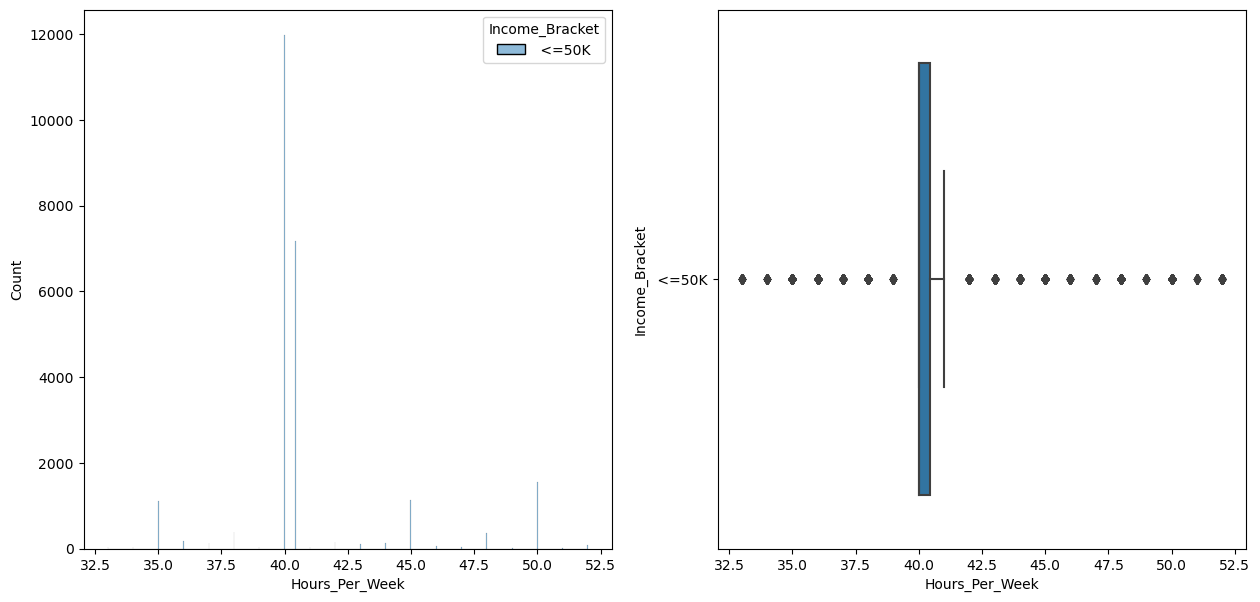

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = k["Hours_Per_Week"], hue = k["Income_Bracket"], ax = ax[0])
sns.boxplot(x = k["Hours_Per_Week"] ,y = k["Income_Bracket"] , ax = ax[1])
plt.show()

### ***Interpretation : Most of the employees between the age group 25 to 55 and earning income < 50K are working for 40 hours a week.

###### 

#### Education_Num wise Income Brackets.

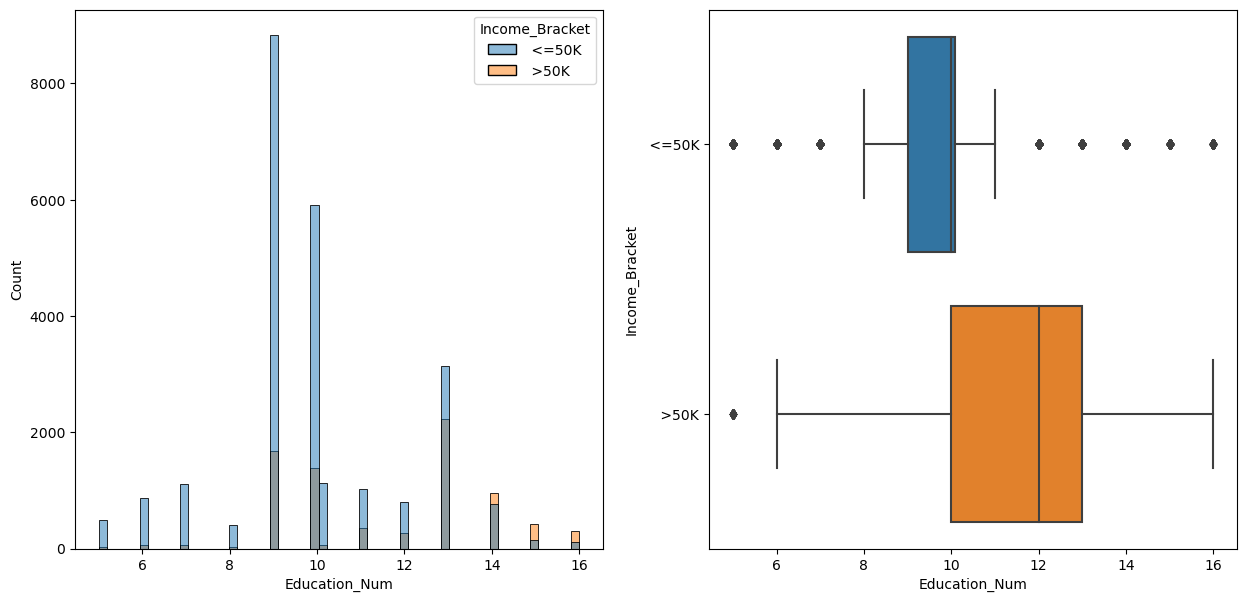

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = y["Education_Num"], hue = y["Income_Bracket"], ax = ax[0])
sns.boxplot(x = y["Education_Num"] ,y = y["Income_Bracket"] , ax = ax[1])
plt.show()

### ***Interpretation : Most of the employees who has Education_Num between 9 - 10 are earning <50 K annual income.

###### 

###### 

# Interpretation : 

### The maximum number of employees in the company are male. Most of them work in the private sector and have an annual income less than 50K. The majority are occupied in the craft-repair field, with an educational background of HS-grad. They are from the United States, not in a family, and fall within the age group of 25 to 45 years. Additionally, they work for 40 hours per week.

###### 

### The key factor influencing annual income is the Education and occupation of the employee.

### 